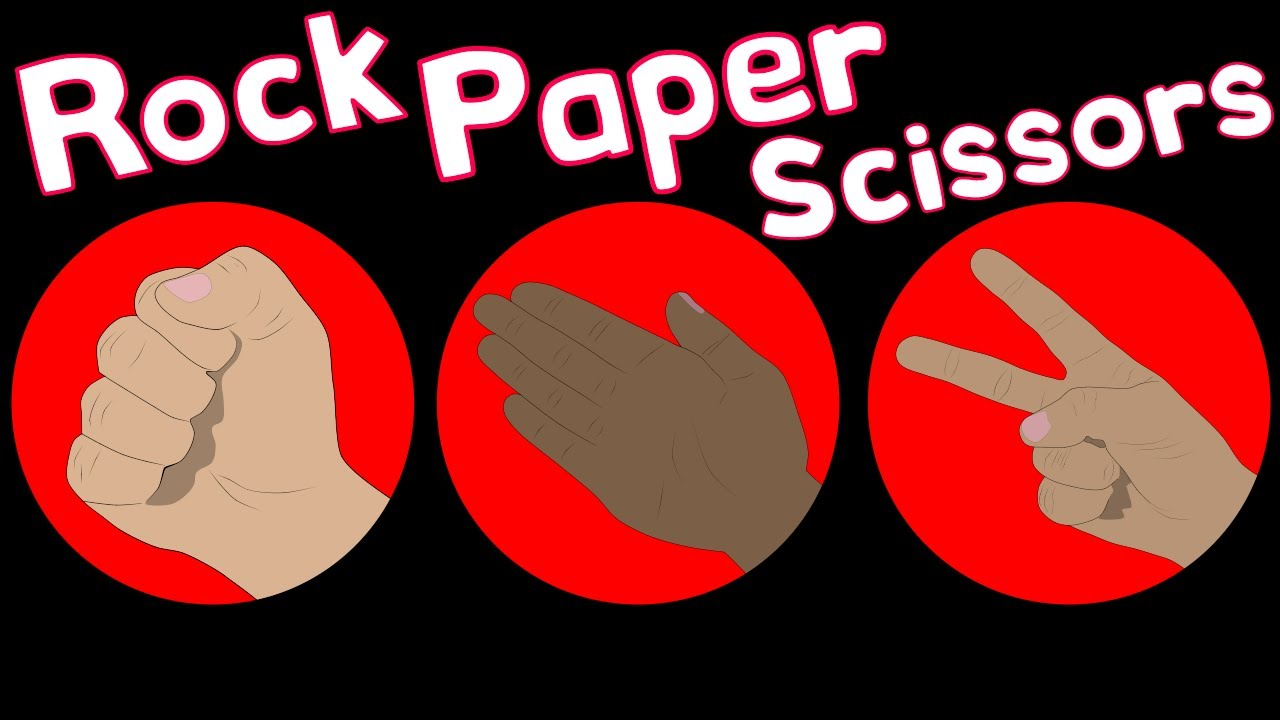

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Dir_path = os.path.join('/content/drive/MyDrive/CV project mentoring/Rock-Paper-Scissors-3')

In [4]:
Train_path = os.path.join('/content/drive/MyDrive/CV project mentoring/Rock-Paper-Scissors-3/train_data')
Test_path = os.path.join('/content/drive/MyDrive/CV project mentoring/Rock-Paper-Scissors-3/test_data')

In [5]:
Train_path

'/content/drive/MyDrive/CV project mentoring/Rock-Paper-Scissors-3/train_data'

In [6]:
Img_size = 128,
Channels = 3,
Input_shape = Img_size,Img_size,Channels

In [7]:
datagen = ImageDataGenerator(
    rotation_range = 360,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1./255
)

In [8]:
train_generator = datagen.flow_from_directory(
    Train_path,
    target_size = (128,128),
    class_mode = 'categorical',
    batch_size = 100,
    shuffle = True
)
val_generator = datagen.flow_from_directory(
    Test_path,
    target_size = (128,128),
    class_mode = 'categorical',
    batch_size = 100,
    shuffle = True
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [14]:
vgg16 = VGG16(include_top=False,weights='imagenet',input_shape = [128,128,3])

for layer in vgg16.layers:
  layer.trainable = False

In [15]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [16]:
from keras.models import Sequential
model = Sequential()

In [17]:
model.add(vgg16)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [19]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
Batch_size = 100
result = model.fit_generator(train_generator,
                    epochs = 10,
                    steps_per_epoch = train_generator.samples//Batch_size,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples//Batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
25/25 [==============================] - 26s 1s/step - loss: 0.0447 - accuracy: 0.9831 - val_loss: 0.6840 - val_accuracy: 0.8033
Epoch 2/5
25/25 [==============================] - 25s 1s/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.4410 - val_accuracy: 0.8467
Epoch 3/5
25/25 [==============================] - 25s 1s/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.1191 - val_accuracy: 0.9533
Epoch 4/5
25/25 [==============================] - 25s 1s/step - loss: 0.0309 - accuracy: 0.9876 - val_loss: 0.5321 - val_accuracy: 0.8433
Epoch 5/5
25/25 [==============================] - 25s 1s/step - loss: 0.0202 - accuracy: 0.9921 - val_loss: 0.1816 - val_accuracy: 0.9567


In [22]:
r = result.history

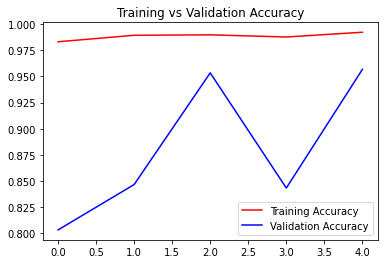

In [23]:
plt.plot(r['accuracy'],'r',label = 'Training Accuracy')
plt.plot(r['val_accuracy'],'b',label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

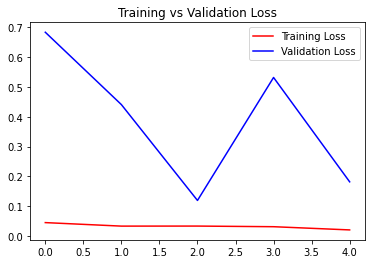

In [24]:
plt.plot(r['loss'],'r',label = 'Training Loss')
plt.plot(r['val_loss'],'b',label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [41]:
print("Accuracy =",round(max(r['accuracy']),2))
print("Validation accuracy =",round(max(r['val_accuracy']),2))

Accuracy = 0.99
Validation accuracy = 0.96
